## Analyzing TMDb movie dataset
#### by Maram Mahmoud

### Preliminary Wrangling

> This data set contains information about 5,000 movies collected from The Movie Database (TMDb), including user ratings and revenue and budget.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
baseColor = sb.color_palette()[0]

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv("tmdb-movies_clean.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10308 entries, 0 to 10307
Data columns (total 17 columns):
Unnamed: 0              10308 non-null int64
id                      10308 non-null int64
imdb_id                 10308 non-null object
popularity              10308 non-null float64
budget                  10308 non-null int64
revenue                 10308 non-null int64
original_title          10308 non-null object
overview                10308 non-null object
runtime                 10308 non-null int64
production_companies    10194 non-null object
release_date            10308 non-null object
vote_count              10308 non-null int64
vote_average            10308 non-null float64
release_year            10308 non-null int64
budget_adj              10308 non-null float64
revenue_adj             10308 non-null float64
genre                   10308 non-null object
dtypes: float64(4), int64(7), object(6)
memory usage: 1.3+ MB


In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df.to_csv("tmdb-movies_clean.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10308 entries, 0 to 10307
Data columns (total 16 columns):
id                      10308 non-null int64
imdb_id                 10308 non-null object
popularity              10308 non-null float64
budget                  10308 non-null int64
revenue                 10308 non-null int64
original_title          10308 non-null object
overview                10308 non-null object
runtime                 10308 non-null int64
production_companies    10194 non-null object
release_date            10308 non-null object
vote_count              10308 non-null int64
vote_average            10308 non-null float64
release_year            10308 non-null int64
budget_adj              10308 non-null float64
revenue_adj             10308 non-null float64
genre                   10308 non-null object
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


In [5]:
len(df.id.unique())

3854

In [6]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
2,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
3,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
4,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


### What is the structure of your dataset?

> The dataset consists of 3854 movies with 16 variables on each movie, The "id" work as the primary key for each movie.

### What is/are the main feature(s) of interest in your dataset?

>The main features are as follows:
- **Revenue**: from 2 to 2.79b.
- **Genre**: 'Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary', 'Foreign', 'TV Movie'.

>I am interested in How movie companies improve their revenue? genre in Genres listed above may be the potential reason associated with movie's Revenue.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Some related components about Revenue such as: Popularity, Vote_average and Budget.

## Univariate Exploration

> In this section, I will look to see the distributions of individual variables of interest. Is revenue data symmetric or skewed?

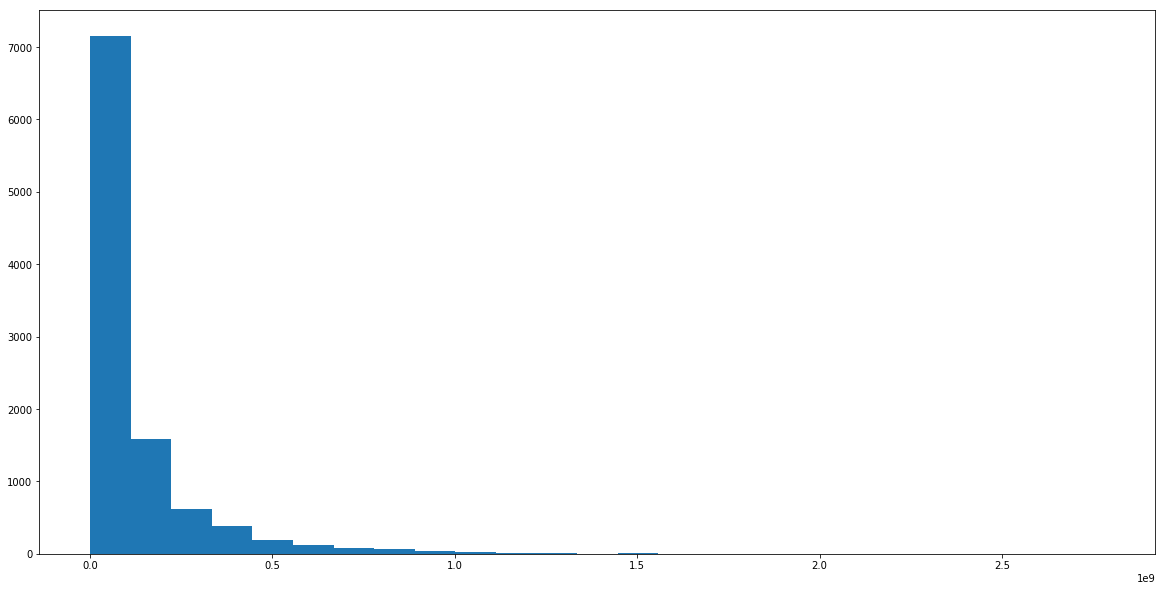

In [7]:
plt.figure(figsize = [20, 10])
plt.hist(data = df, x = 'revenue', bins = 25);

> we see that revenue data are right skewed.

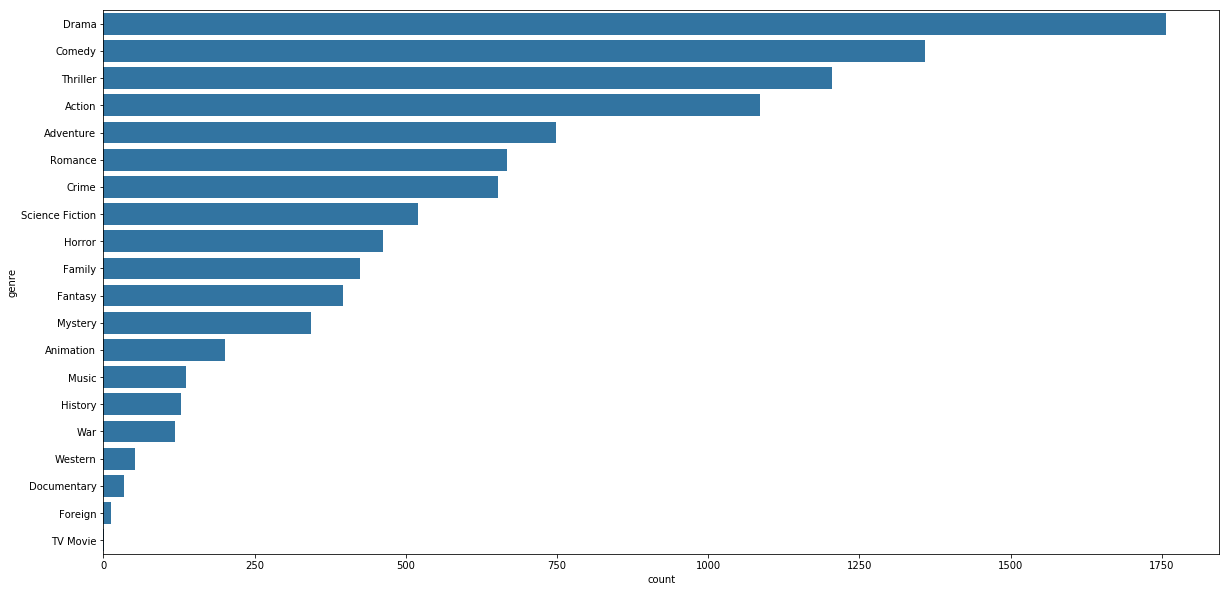

In [8]:
plt.figure(figsize = [20, 10])
type_counts = df['genre'].value_counts()
type_order = type_counts.index
sb.countplot(data = df , y='genre' , color = baseColor, order = type_order)

> Overall we can see, that Drama then Comedy, Thriller and Action are the most commen generes in this dataset.

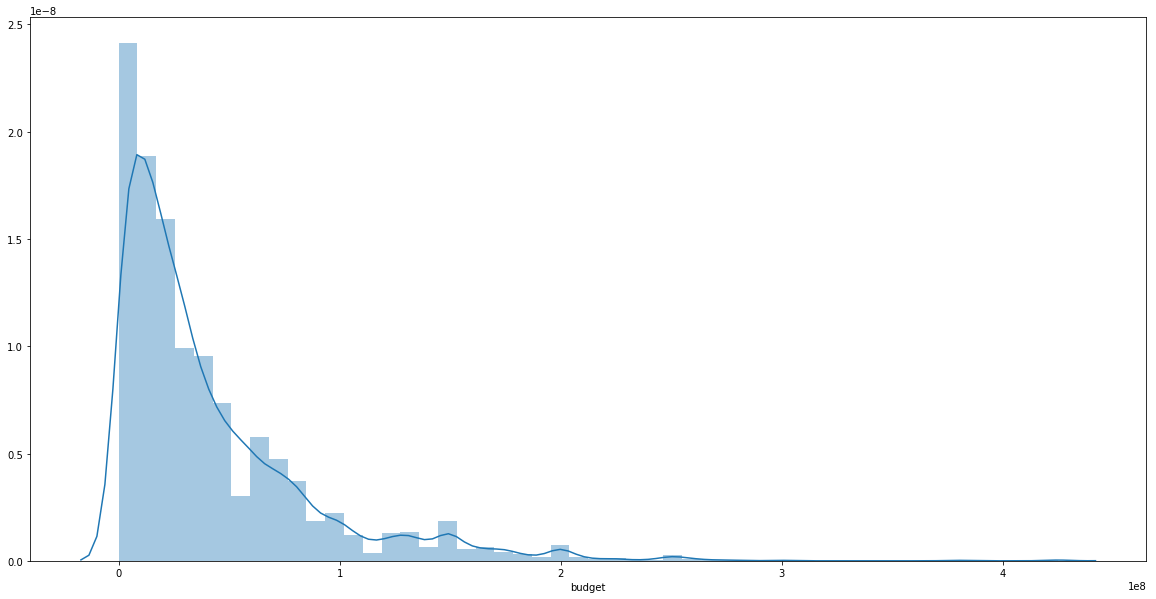

In [9]:
plt.figure(figsize = [20, 10])
sb.distplot(df.budget)

 > we see that budget data are right skewed.

## Bivariate Exploration

> In this section, I look for relationships between pairs of variables in the
data.
- genere and revenue
- budget and revenue
- vote_average and revenue
- popularty and revenue

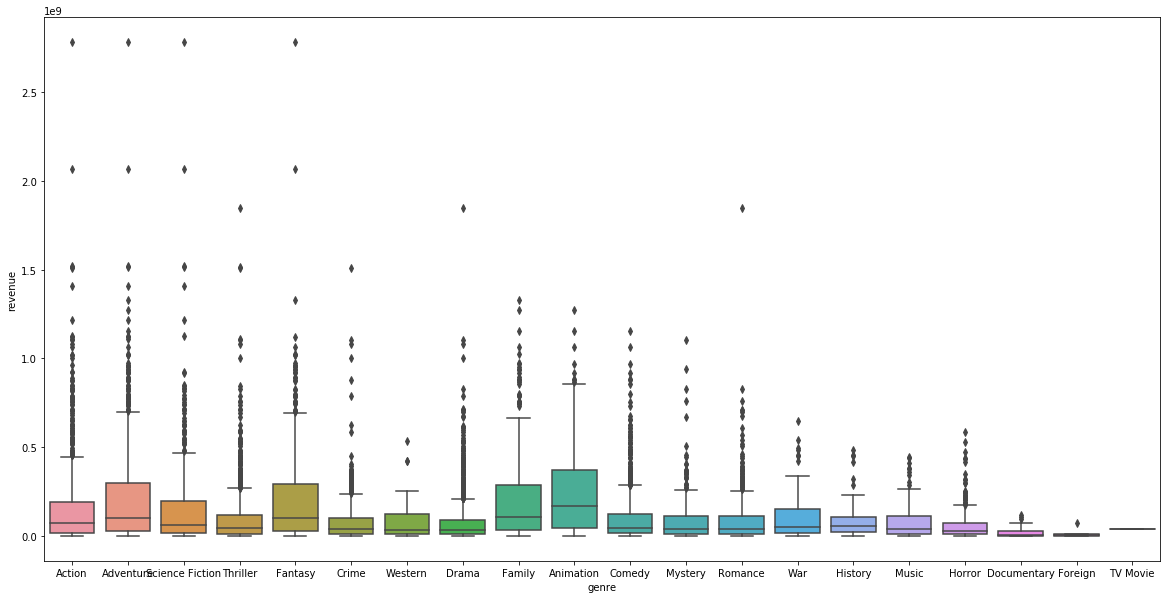

In [10]:
plt.figure(figsize = [20, 10])
sb.boxplot(x="genre", y="revenue",data=df)

> We can see that the Animation then Adventure, Fantasy, Family have the largest revenue mean.

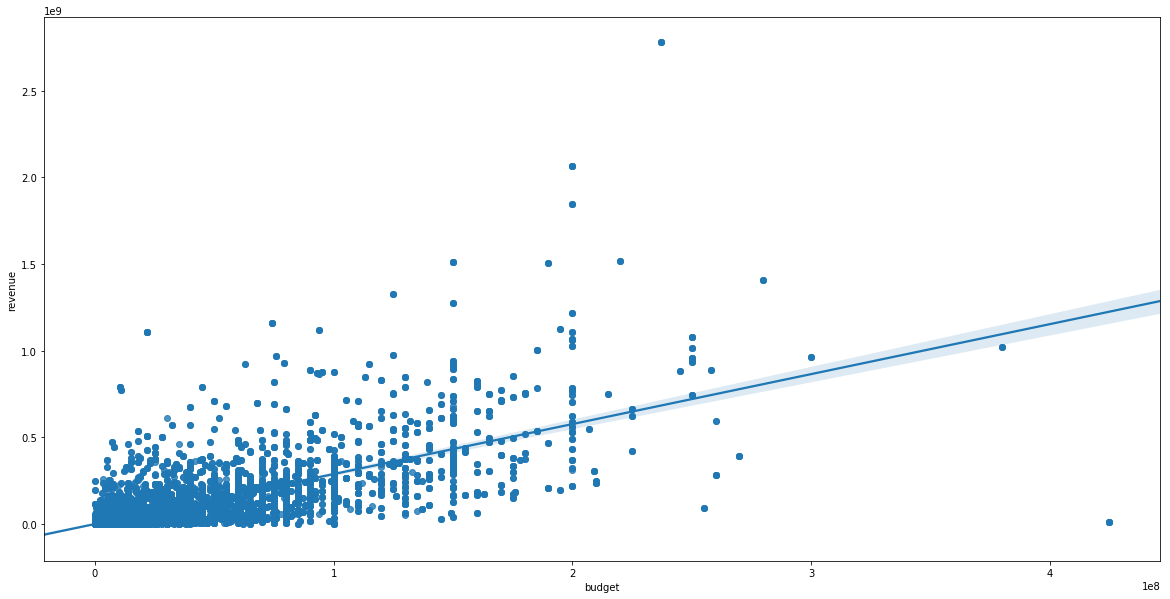

In [11]:
plt.figure(figsize = [20, 10])
sb.regplot(x="budget", y="revenue",data=df)

> We can  see that there is a positive relationship between the Budget and Revenue

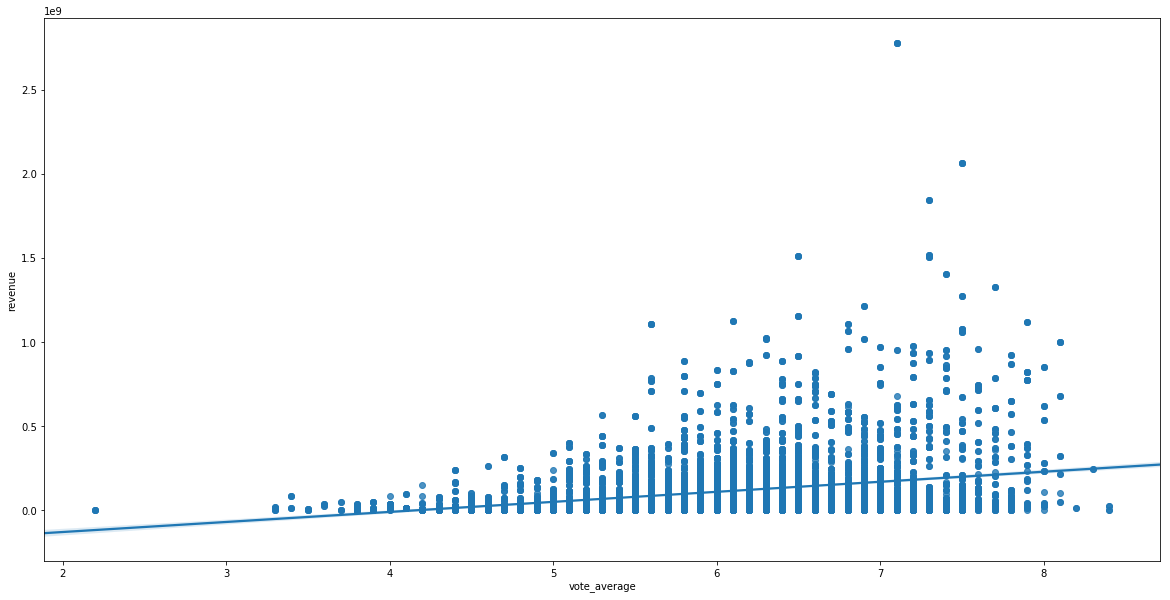

In [12]:
plt.figure(figsize = [20, 10])
sb.regplot(x="vote_average", y="revenue",data=df)

> We can see that there is a so week relationship between the Budget and Revenue

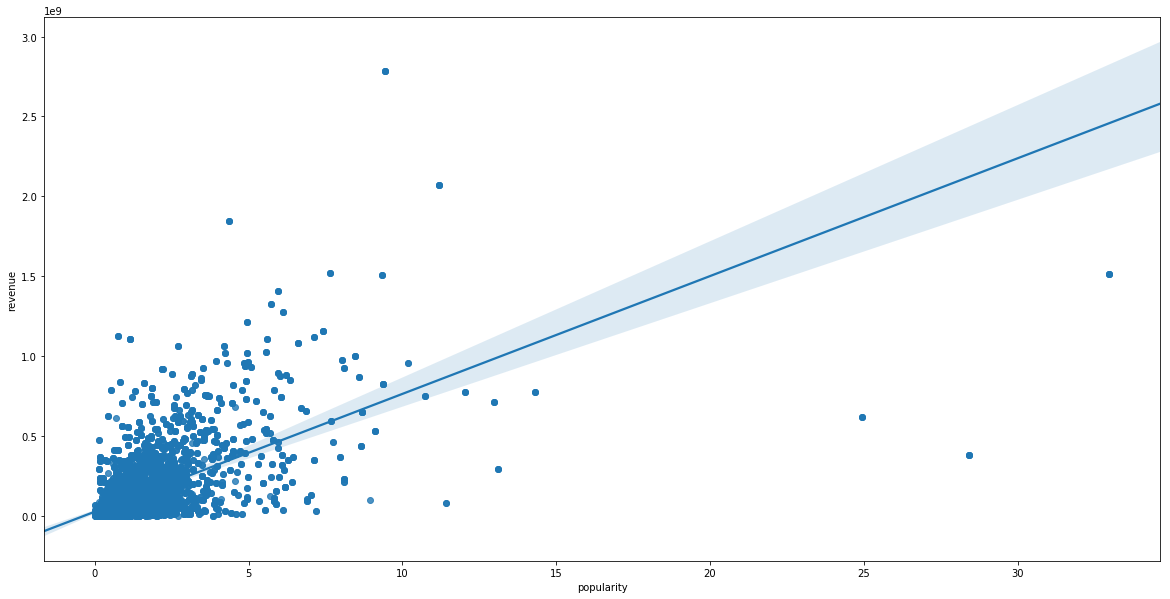

In [13]:
plt.figure(figsize = [20, 10])
sb.regplot(x="popularity", y="revenue",data=df)

> We can see that there is a strong positive relationship between the popularity and Revenue

## Multivariate Exploration

> We have seen the affect of popularty on revenue and now I want to see how the popularity of the most common generes (Drama and Comedy) over the years.

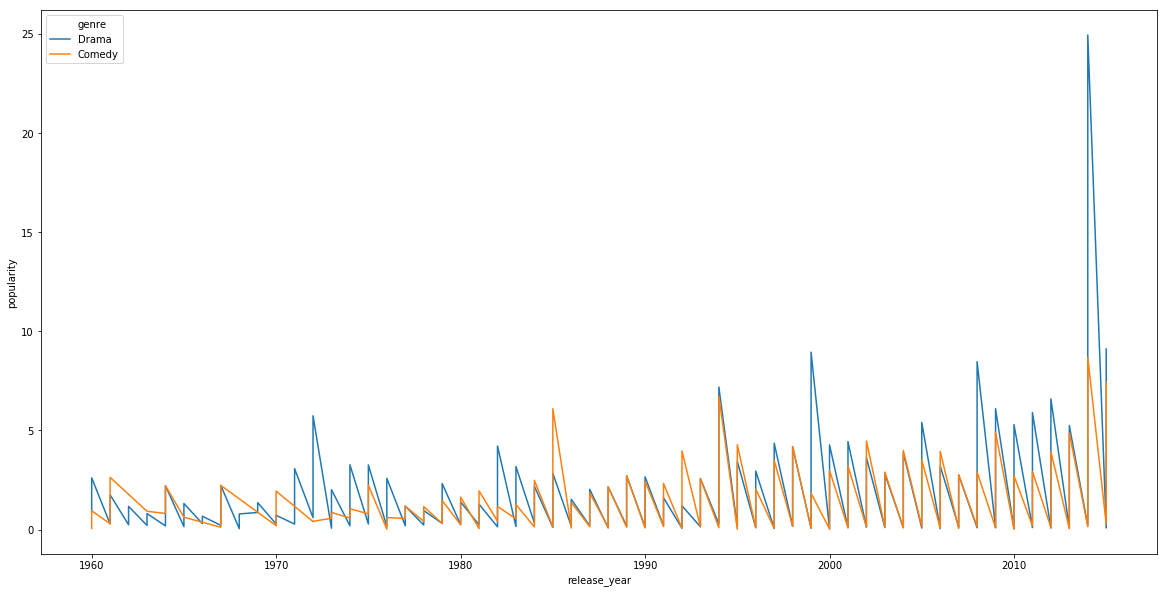

In [14]:
plt.figure(figsize = [20, 10])
genere_df = df.loc[(df.genre=='Drama')|(df.genre=='Comedy')]
sb.lineplot(x="release_year", y="popularity", hue="genre", estimator=None,data=genere_df)



> we can see that the popularity on both drama and comedy incresed over years but more on Drama.
